# Code
## UIN:729007151

In [2]:
#importing all necessary packages

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
import math
import statistics
%matplotlib inline

In [3]:
#data reading
df = pd.read_csv('hw1_question1_train_edit.csv')
devdf = pd.read_csv('hw1_question2_dev_edit.csv')
Row_list_dev =[] 
for i in range((devdf.shape[0])): 
    Row_list_dev.append(list(devdf.iloc[i, :]))

testdf = pd.read_csv('hw1_question2_test_edit.csv')
Row_list_test =[] 
for i in range((testdf.shape[0])): 
    Row_list_test.append(list(testdf.iloc[i, :]))
    
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,10,10,9,3,7,5,3,5,1,4
1,1,1,1,1,1,1,3,1,1,2
2,1,1,1,1,1,1,3,1,1,2
3,5,1,1,1,1,1,3,1,1,2
4,8,10,10,10,5,10,8,10,6,4


### Q2(a.i)

In [4]:
#Computing number of samples with benign and malignant tumors
df_benign = df.query('Class == "2"')
df_malign = df.query('Class == "4"')
print("Benign =",df_benign.shape[0])
print("Malignant =",df_malign.shape[0])

Benign = 330
Malignant = 153


### Q2(a.ii)

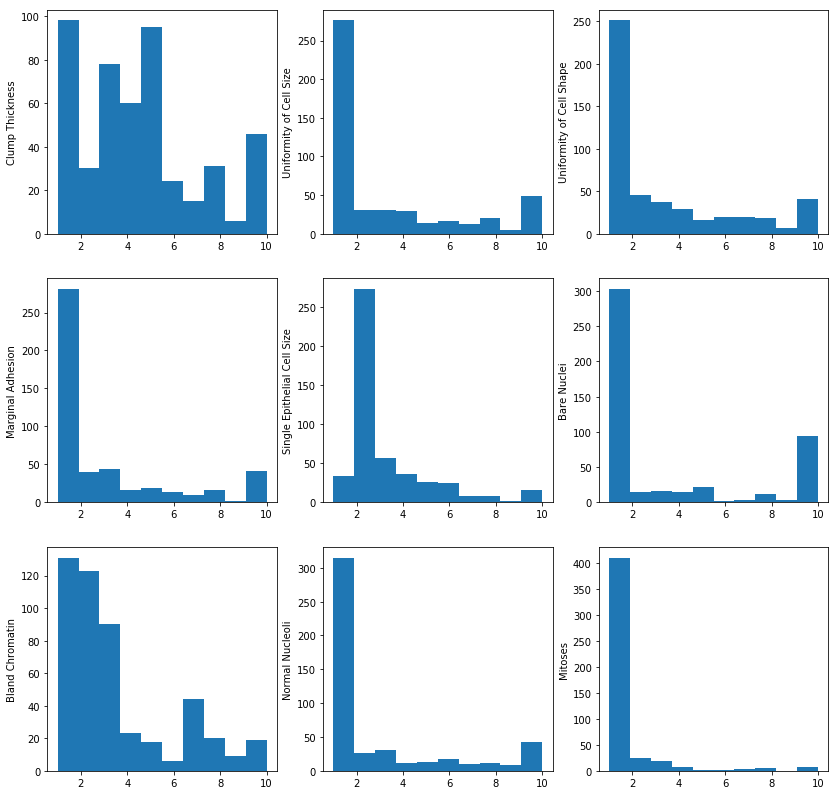

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(14,14))

for i,keys in enumerate(df.keys()[:9]):
    #print(df[i])
    plt.subplot(3,3,i+1)
    plt.ylabel(keys)
    df3 = df[keys]
    plt.hist(df3)

### Q2(a.iii)

C:\Users\Priya\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


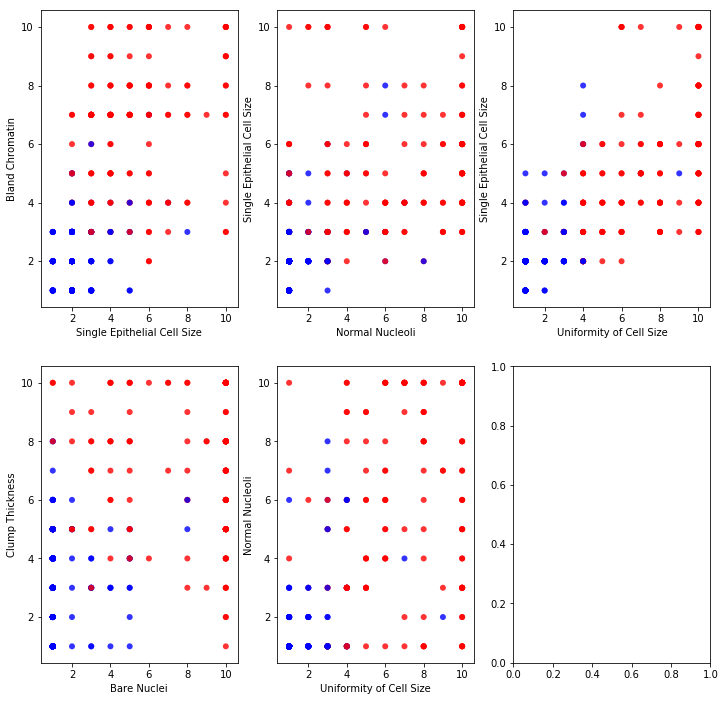

In [6]:
lst = []
random.seed(45)
for i in range(5):
    a = random.randint(0,9)
    b = random.randint(0,9)
    while(a==b):
        b = random.randint(0,9)
    lst.append((a,b))

fig, axs = plt.subplots(2, 3, figsize=(12,12))
list_map = df.keys()
list_num = df[list_map[9]]
colors = ["red","blue"]
for i,j in enumerate(lst):
    k,l = j
    for s,_ in enumerate(list_num):
        plt.subplot(2,3,i+1)
        if df[list_map[9]][s] == 2:   
            color = colors[1]
        else:
            color = colors[0]
        plt.xlabel(list_map[k])
        plt.ylabel(list_map[l]) 
        plt.scatter(df[list_map[k]][s], df[list_map[l]][s], alpha=0.8, c= color, edgecolors='none')

### Q2(b.i,b.ii)

57 40 2 1
58 41 1 0
58 40 1 1
58 39 1 2
58 39 1 2
58 39 1 2
58 39 1 2
58 39 1 2
58 39 1 2
58 39 1 2


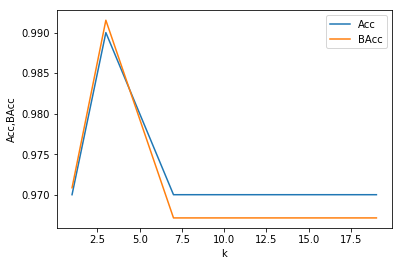

In [11]:
#Function to calculate Euclidean distance
def euc_dist(point_1,point_2):
    dist = 0
    for i in range(len(point_1)-1):
        dist = dist + (point_1[i] - point_2[i])**2
    return math.sqrt(dist)
Row_list_train =[] 
for i in range((df.shape[0])): 
    Row_list_train.append(list(df.iloc[i, :]))
    
#Function returns k nearest neighbors
def get_neighbors(k,row_num):
    neighbors = {}
    distance = 0
    final_neighbors = []
    for i in range(len(Row_list_train)):
        distance = euc_dist(Row_list_train[i],Row_list_dev[row_num])
        neighbors[i] = distance
    sorted_dict = sorted(neighbors.items(), key=lambda item: item[1])
    for m in range(k):
        final_neighbors.append(sorted_dict[m])
    return final_neighbors

#print(get_neighbors(3,0))
#print(get_neighbors(3,1))
#print(get_neighbors(3,2))

#KNN implementation using above 2 functions for validation set.

knn_neighbors = {}
pred = {}

k_val = [1,3,5,7,9,11,13,15,17,19]

acc_dict = {}

for k in k_val:

    for s in range(len(Row_list_dev)):
        knn_neighbors[s] = get_neighbors(k,s)
    
    #Classification of benign and malign by taking arg max.

    for i,j in enumerate(knn_neighbors.values()):
        cl_list = []
        for m,n in j:
            cl = Row_list_train[m][9]
            cl_list.append(cl)
        pred[i] = statistics.mode(cl_list)
    
    #Q2(b.ii)    
    #Count correcly classified and misclassified samples

    count_1 = 0
    count_2 = 0
    mis_count_1 = 0
    mis_count_2 = 0    

    for i,j in enumerate(pred.values()):
        if ((j == Row_list_dev[i][9]) and j == 2):
            count_1 = count_1 + 1
        elif ((j == Row_list_dev[i][9]) and j == 4):
            count_2 = count_2 + 1
        elif (Row_list_dev[i][9] == 2):
            mis_count_1 = mis_count_1+1
        elif (Row_list_dev[i][9] == 4):
            mis_count_2 = mis_count_2+1

    print(count_1,count_2,mis_count_1,mis_count_2)
        
    
    acc_dev = (count_1 + count_2)/len(Row_list_dev)
    bcc_dev = (count_1/(count_1+mis_count_1) + count_2/(count_2 + mis_count_2))/2
    acc_dict[k] = (acc_dev,bcc_dev)
    
#printing and plotting the above results    
    
#print("k: (acc,BAcc)=", acc_dict)
acc_list = []
bacc_list = []
for i,j in acc_dict.values():
    acc_list.append(i)
    bacc_list.append(j)

plt.xlabel('k')
plt.ylabel('Acc,BAcc')

plt.plot(k_val,acc_list,label = 'Acc')
plt.plot(k_val,bacc_list,label = 'BAcc')
a = plt.gca()
a.legend()

#### k: (acc,BAcc)= {1: (0.97, 0.9708557255064076), 3: (0.99, 0.9915254237288136), 5: (0.98, 0.9793303017775941), 7: (0.97, 0.9671351798263745), 9: (0.97, 0.9671351798263745), 11: (0.97, 0.9671351798263745), 13: (0.97, 0.9671351798263745), 15: (0.97, 0.9671351798263745), 17: (0.97, 0.9671351798263745), 19: (0.97, 0.9671351798263745)}

#### k1 = 3
#### k2 = 3

### Q2(b.iii)

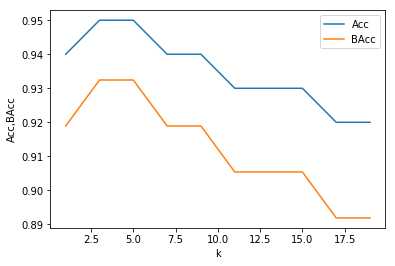

In [7]:
#KNN implementation for test data set.

#Function returns k nearest neighbors
def get_neighbors_2(k,row_num):
    neighbors = {}
    distance = 0
    final_neighbors = []
    for i in range(len(Row_list_train)):
        distance = euc_dist(Row_list_train[i],Row_list_test[row_num])
        neighbors[i] = distance
    sorted_dict = sorted(neighbors.items(), key=lambda item: item[1])
    for m in range(k):
        final_neighbors.append(sorted_dict[m])
    return final_neighbors

knn_neighbors_test = {}
pred_test = {}

k_val = [1,3,5,7,9,11,13,15,17,19]

acc_dict_test = {}

for k in k_val:

    for s in range(len(Row_list_test)):
        knn_neighbors_test[s] = get_neighbors_2(k,s)
    
    #Classification of benign and malign by taking arg max.

    for i,j in enumerate(knn_neighbors_test.values()):
        cl_list_test = []
        for m,n in j:
            cl_test = Row_list_train[m][9]
            cl_list_test.append(cl_test)
        pred_test[i] = statistics.mode(cl_list_test)
      
    #Count correcly classified and misclassified samples

    count_1 = 0
    count_2 = 0
    mis_count_1 = 0
    mis_count_2 = 0    

    for i,j in enumerate(pred_test.values()):
        if ((j == Row_list_test[i][9]) and j == 2):
            count_1 = count_1 + 1
        elif ((j == Row_list_test[i][9]) and j == 4):
            count_2 = count_2 + 1
        elif (Row_list_test[i][9] == 2):
            mis_count_1 = mis_count_1+1
        elif (Row_list_test[i][9] == 4):
            mis_count_2 = mis_count_2+1
        
    
    acc_test = (count_1 + count_2)/len(Row_list_test)
    bcc_test = (count_1/(count_1+mis_count_1) + count_2/(count_2 + mis_count_2))/2
    acc_dict_test[k] = (acc_test,bcc_test)
    
#printing and plotting the above results    
    
#print("k: (acc,BAcc)=", acc_dict_test)
acc_list = []
bacc_list = []
for i,j in acc_dict_test.values():
    acc_list.append(i)
    bacc_list.append(j) 
plt.xlabel('k')
plt.ylabel('Acc,BAcc')

plt.plot(k_val,acc_list,label = 'Acc')
plt.plot(k_val,bacc_list,label = 'BAcc')
a = plt.gca()
a.legend()

#### k: (acc,BAcc)= {1: (0.94, 0.9189189189189189), 3: (0.95, 0.9324324324324325), 5: (0.95, 0.9324324324324325), 7: (0.94, 0.9189189189189189), 9: (0.94, 0.9189189189189189), 11: (0.93, 0.9054054054054055), 13: (0.93, 0.9054054054054055), 15: (0.93, 0.9054054054054055), 17: (0.92, 0.8918918918918919), 19: (0.92, 0.8918918918918919)}

#### For k1 and k2, Acc and BAcc are 0.95 and  0.9324324324324325

### Q2(iv)

### Replacng Euclidean distance with l1 norm

In [8]:
def l1_norm(point_1,point_2):
    dist = 0
    for i in range(len(point_1)-1):
        dist = dist + abs((point_1[i] - point_2[i]))
    return dist

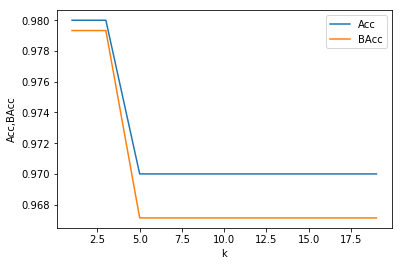

In [9]:
def get_neighbors(k,row_num):
    neighbors = {}
    distance = 0
    final_neighbors = []
    for i in range(len(Row_list_train)):
        distance = l1_norm(Row_list_train[i],Row_list_dev[row_num])
        neighbors[i] = distance
    sorted_dict = sorted(neighbors.items(), key=lambda item: item[1])
    for m in range(k):
        final_neighbors.append(sorted_dict[m])
    return final_neighbors

#KNN implementation using above 2 functions for validation set.

knn_neighbors = {}
pred = {}

k_val = [1,3,5,7,9,11,13,15,17,19]

acc_dict = {}

for k in k_val:

    for s in range(len(Row_list_dev)):
        knn_neighbors[s] = get_neighbors(k,s)
    
    #Classification of benign and malign by taking arg max.

    for i,j in enumerate(knn_neighbors.values()):
        cl_list = []
        for m,n in j:
            cl = Row_list_train[m][9]
            cl_list.append(cl)
        pred[i] = statistics.mode(cl_list)
    
    #Q2(b.ii)    
    #Count correcly classified and misclassified samples

    count_1 = 0
    count_2 = 0
    mis_count_1 = 0
    mis_count_2 = 0    

    for i,j in enumerate(pred.values()):
        if ((j == Row_list_dev[i][9]) and j == 2):
            count_1 = count_1 + 1
        elif ((j == Row_list_dev[i][9]) and j == 4):
            count_2 = count_2 + 1
        elif (Row_list_dev[i][9] == 2):
            mis_count_1 = mis_count_1+1
        elif (Row_list_dev[i][9] == 4):
            mis_count_2 = mis_count_2+1
        
    
    acc_dev = (count_1 + count_2)/len(Row_list_dev)
    bcc_dev = (count_1/(count_1+mis_count_1) + count_2/(count_2 + mis_count_2))/2
    acc_dict[k] = (acc_dev,bcc_dev)
    
#printing and plotting the above results    
    
#print("k: (acc,BAcc)=", acc_dict)
acc_list = []
bacc_list = []
for i,j in acc_dict.values():
    acc_list.append(i)
    bacc_list.append(j) 
plt.xlabel('k')
plt.ylabel('Acc,BAcc')

plt.plot(k_val,acc_list,label = 'Acc')
plt.plot(k_val,bacc_list,label = 'BAcc')
a = plt.gca()
a.legend()

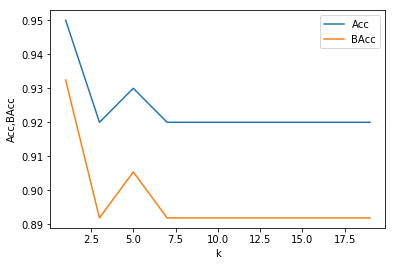

In [10]:
#Function returns k nearest neighbors
def get_neighbors_2(k,row_num):
    neighbors = {}
    distance = 0
    final_neighbors = []
    for i in range(len(Row_list_train)):
        distance = l1_norm(Row_list_train[i],Row_list_test[row_num])
        neighbors[i] = distance
    sorted_dict = sorted(neighbors.items(), key=lambda item: item[1])
    for m in range(k):
        final_neighbors.append(sorted_dict[m])
    return final_neighbors

knn_neighbors_test = {}
pred_test = {}

k_val = [1,3,5,7,9,11,13,15,17,19]

acc_dict_test = {}

for k in k_val:

    for s in range(len(Row_list_test)):
        knn_neighbors_test[s] = get_neighbors_2(k,s)
    
    #Classification of benign and malign by taking arg max.

    for i,j in enumerate(knn_neighbors_test.values()):
        cl_list_test = []
        for m,n in j:
            cl_test = Row_list_train[m][9]
            cl_list_test.append(cl_test)
        pred_test[i] = statistics.mode(cl_list_test)
      
    #Count correcly classified and misclassified samples

    count_1 = 0
    count_2 = 0
    mis_count_1 = 0
    mis_count_2 = 0    

    for i,j in enumerate(pred_test.values()):
        if ((j == Row_list_test[i][9]) and j == 2):
            count_1 = count_1 + 1
        elif ((j == Row_list_test[i][9]) and j == 4):
            count_2 = count_2 + 1
        elif (Row_list_test[i][9] == 2):
            mis_count_1 = mis_count_1+1
        elif (Row_list_test[i][9] == 4):
            mis_count_2 = mis_count_2+1
        
    
    acc_test = (count_1 + count_2)/len(Row_list_test)
    bcc_test = (count_1/(count_1+mis_count_1) + count_2/(count_2 + mis_count_2))/2
    acc_dict_test[k] = (acc_test,bcc_test)
    
#printing and plotting the above results    
    
#print("k: (acc,BAcc)=", acc_dict_test)
acc_list = []
bacc_list = []
for i,j in acc_dict_test.values():
    acc_list.append(i)
    bacc_list.append(j) 
plt.xlabel('k')
plt.ylabel('Acc,BAcc')

plt.plot(k_val,acc_list,label = 'Acc')
plt.plot(k_val,bacc_list,label = 'BAcc')
a = plt.gca()
a.legend()